In [1]:
%matplotlib inline

import geopandas as gpd
from shapely.geometry import Polygon
from fiona.crs import from_epsg

from utils import PHL_CRS, reproject_gdf

Read in the points

In [2]:
points = gpd.read_file('../data/remediations.shp')

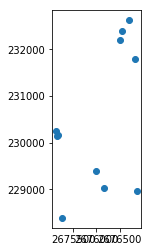

In [3]:
points.plot()

Convert the points into a Polygon

In [4]:
poly = Polygon(zip(points.X, points.Y))

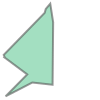

In [5]:
poly

Create an empty GeoDataFrame

In [6]:
gdf = gpd.GeoDataFrame()

Insert the-polygon into the GeoDataFrame using the geometry column

In [7]:
gdf.loc[0, 'geometry'] = poly

Reproject the data to the coordinate system used by the city

In [8]:
gdf = reproject_gdf(gdf=gdf, start_crs=4326, end_crs=PHL_CRS)

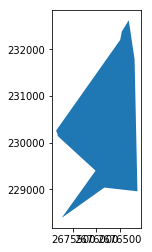

In [9]:
gdf.plot()

In [10]:
# Save to a shapefile
gdf.to_file('../data/remediations_poly.shp')